In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<Axes: >

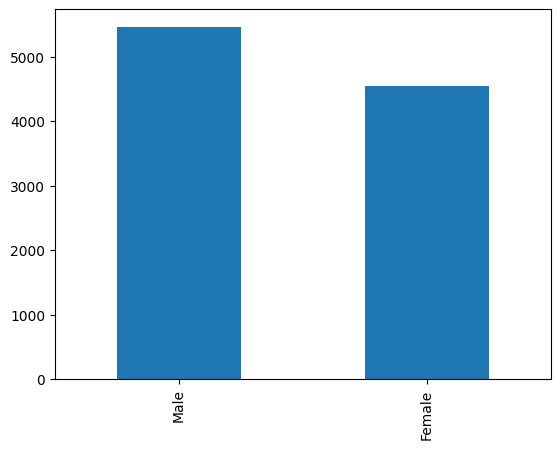

In [8]:
df.Gender.value_counts().plot(kind='bar')

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: >

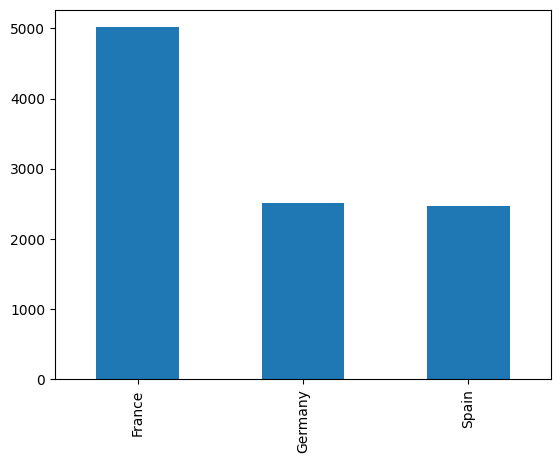

In [10]:
df['Geography'].value_counts().plot(kind = 'bar')

In [12]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [13]:
df['HasCrCard'].unique()

array([1, 0])

In [14]:
df['IsActiveMember'].unique()

array([1, 0])

In [15]:
df['Exited'].unique()

array([1, 0])

In [16]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: >

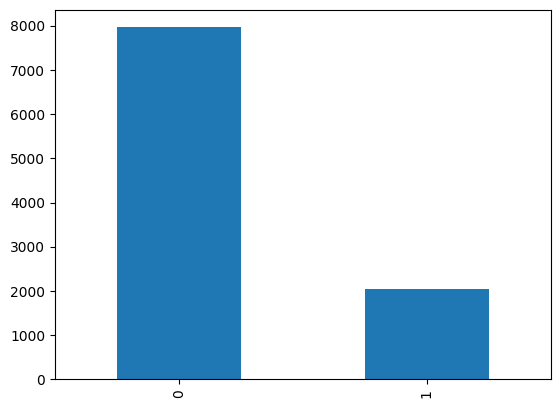

In [29]:
df['Exited'].value_counts().plot(kind = 'bar')

In [19]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# finding outliers

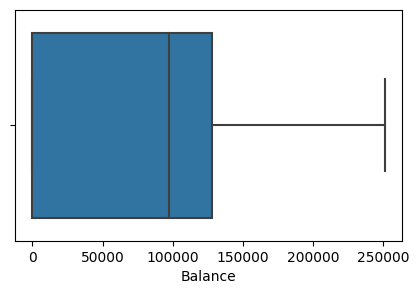

In [25]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df,x = 'Balance')
plt.show()

<Axes: xlabel='Age'>

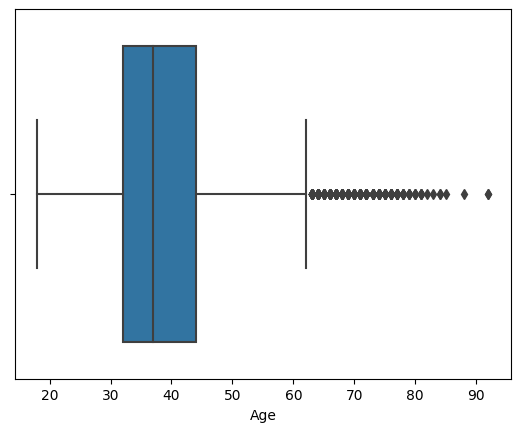

In [26]:
sns.boxplot(x = 'Age',data=df)

<Axes: xlabel='EstimatedSalary'>

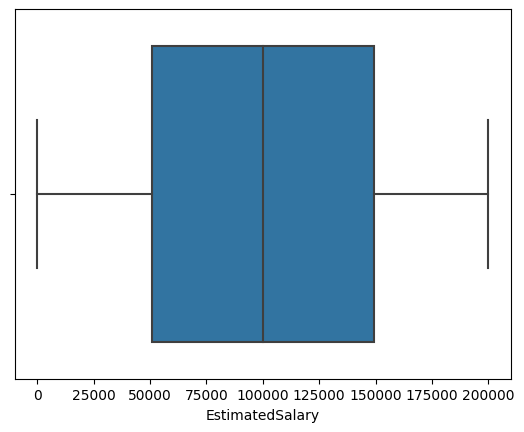

In [27]:
sns.boxplot(x='EstimatedSalary',data=df)

Remove outlier

In [30]:
qrt1 = np.quantile(df['Age'],q=0.25)
median = df['Age'].median()
qrt3 = np.quantile(df['Age'],q=0.75)
iqr = qrt3-qrt1
lowb = qrt1-1.5*iqr
uppb = qrt3+1.5*iqr
print('lowerband:',lowb)
print('upperband:',uppb)
print('median:',median)

lowerband: 14.0
upperband: 62.0
median: 37.0


In [32]:
outliers=[]
for i in df['Age']:
  if i < lowb:
    outliers.append(lowb)
  elif i > uppb:
    outliers.append(uppb)
  else:
    outliers.append(i)

df['Age'] = outliers

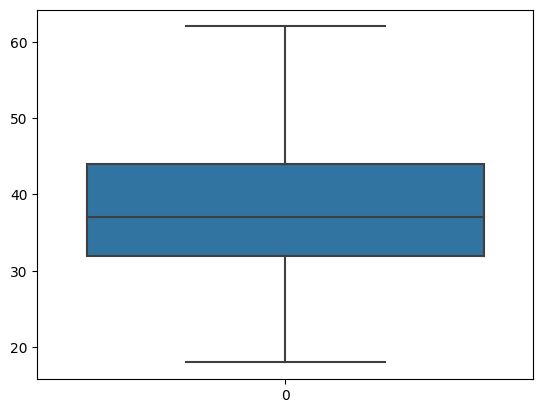

In [33]:
sns.boxplot(df['Age'])
plt.show()

In [37]:
df.shape

(10000, 14)

In [39]:
df['Age'].shape

(10000,)

In [49]:
df['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [51]:
import seaborn as sns
sns.set_theme(style="whitegrid")

<Axes: xlabel='Exited', ylabel='count'>

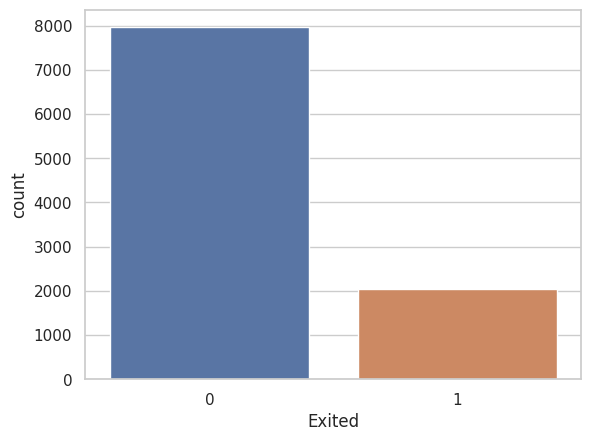

In [53]:
sns.countplot(x=df['Exited'])

<Axes: xlabel='Gender', ylabel='count'>

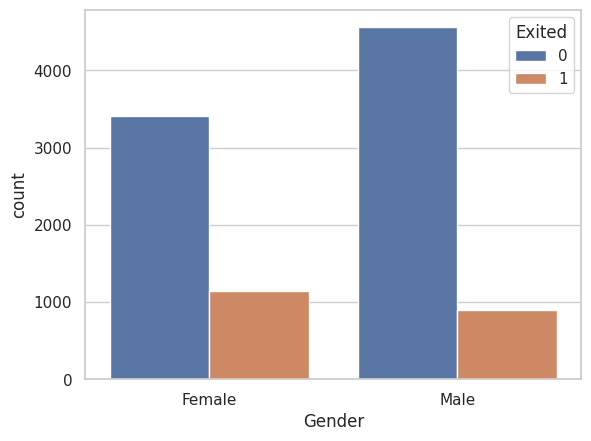

In [55]:
sns.countplot(x = df['Gender'],hue=df['Exited'])

<Axes: xlabel='Geography', ylabel='count'>

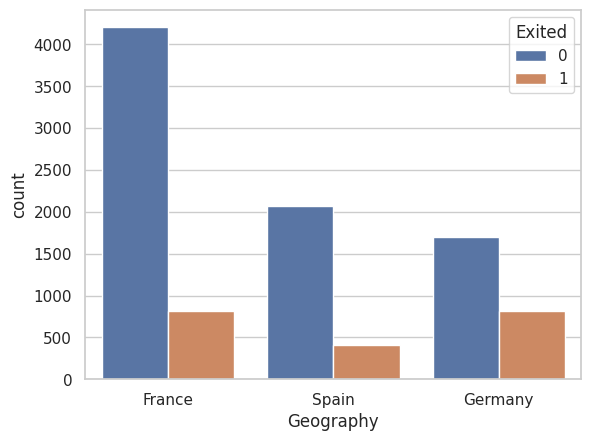

In [56]:
sns.countplot(x=df['Geography'],hue=df['Exited'])

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.shape

(10000, 14)

In [63]:
target_value = df['Exited'].value_counts()
target_value

0    7963
1    2037
Name: Exited, dtype: int64

In [62]:
print('Class_N:', target_value[0])
print('Class_Y:',target_value[1])

Class_N: 7963
Class_Y: 2037


In [64]:
class_y = round(target_value[1]*100/(target_value[0]+target_value[1]))

In [65]:
print('Class Y value in percentage:',class_y)
print('Class N value in percentage:',100-class_y)

Class Y value in percentage: 20
Class N value in percentage: 80


# Drop unwanted columns

In [66]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0


In [67]:
df_1 = df.copy()

In [68]:
df_1.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0


In [75]:
df_1 = df.copy()

In [76]:
df_1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0


In [80]:
df.groupby(['Exited']).mean()

<ipython-input-80-9fe84dfd1e3d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Exited']).mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.120683,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.681394,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


<ipython-input-82-8bb27c4d9ae7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1.corr(),fmt='.2g',annot=True,linewidths=0.01,linecolor='white')


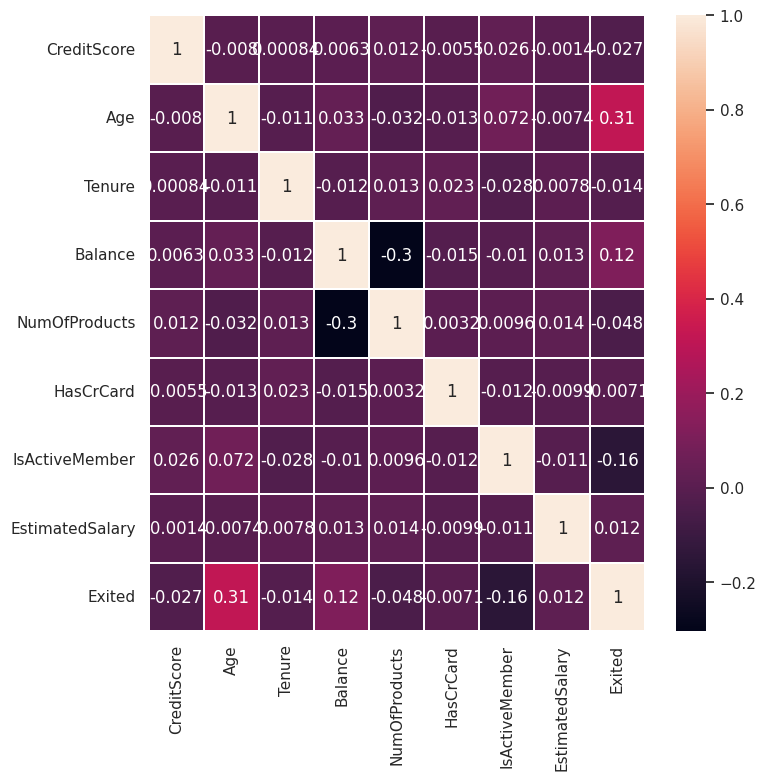

In [82]:
plt.figure(figsize=(8,8))
sns.heatmap(df_1.corr(),fmt='.2g',annot=True,linewidths=0.01,linecolor='white',)
plt.show()

# string into convert numerical value

In [85]:
df_1['Geography'] = df_1['Geography'].map({'France':0,'Spain':1,'Germany':2})
df_1['Gender'] = df_1['Gender'].map({'Female':0,'Male':1})

In [86]:
df_1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,1,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,1,0,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39.0,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36.0,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42.0,3,75075.31,2,1,0,92888.52,1


# spliting data

In [ ]:
#